# WFST POS Tagging Tiny Demo
by Ye Kyaw Thu, Lab Leader, LST Lab., Myanmar  
Date: 17 July 2025

## Shell Scripts

ဒီ Lab မှာက OpenFST command တွေကို သုံးပြီး NLP field မှာ အရေးကြီးတဲ့ task တစ်ခုဖြစ်တဲ့ POS (Part-of-Speech) Tagging ကို လက်တွေ့ လုပ်ပြသွားမယ်။  
ကိုယ့်စက်ထဲမှာ လိုက်လုပ်ဖို့အတွက်က လိုအပ်တဲ့ OpenFST နဲ့ တခြား python library တွေက ကြိုတင် installation လုပ်ထားရလိမ့်မယ်။  

In [16]:
cd /home/ye/exp/tiny_pos

/home/ye/exp/tiny_pos


Bash shell script တွေက အောက်ပါအတိုင်း

In [17]:
!ls ./shell_script/*.sh

./shell_script/build_fst.sh	   ./shell_script/rebuild.sh
./shell_script/find_blank_line.sh  ./shell_script/run_tagger.sh
./shell_script/pipe2space.sh	   ./shell_script/run_wfst_pos.sh
./shell_script/preprocess.sh	   ./shell_script/test_tagger.sh


Python နဲ့ perl script တွေက အောက်ပါအတိုင်း

In [18]:
!ls ./script/*.{py,pl}

./script/build_lexicon.py  ./script/pos_evaluation.py
./script/build_pos_lm.py   ./script/prepare_test_data.py
./script/col2line.pl	   ./script/preprocess.py
./script/evaluate.py


## Dataset 

POS Tagging အတွက် ဒေတာက LU Lab. ရဲ့ ဒေတာဖြစ်တဲ့ myPOS (Version 3.0) ကိုသုံးပါမယ်။  
ဒေတာ download လုပ်တဲ့ အဆင့်ကို ကျော်ပါမယ်။  
ဒေတာက publicly available ပါ။ အောက်ပါ လင့်ကနေ ယူသုံးနိုင်ပါတယ်။  
[https://github.com/ye-kyaw-thu/myPOS/tree/master/corpus-ver-3.0](https://github.com/ye-kyaw-thu/myPOS/tree/master/corpus-ver-3.0)  

**ဒီ Notebook မှာက FST model တွေကို visualization လုပ်ပြဖို့ ရည်ရွယ်တာမို့လို့ စာကြောင်း ၁၀ကြောင်းလောက်ကိုပဲ random ဆွဲထုတ်ပြီး training corpus အဖြစ် ထားသွားပါမယ်။**  

In [20]:
!mkdir data

In [21]:
!shuf ../wfst_pos/data/mypos-ver.3.0.shuf.txt | head -n 10 > ./data/corpus.raw

shuf: write error: Broken pipe


In [26]:
!wc ./data/corpus.raw

  10   99 1615 ./data/corpus.raw


In [27]:
!cat ./data/corpus.raw

အပြင်/n မှာ/ppm မိုးရွာ/v နေ/part တယ်/ppm ။/punc
ငါ/pron ဆို/v သည်/ppm ကား/part ၊/punc သူ/n တို့/part ၏/ppm ကောင်းကင်/n|တမန်/n တို့/part သည်/ppm ကောင်းကင်ဘုံ/n ၌/ppm ရှိ/v တော်/part မူ/part သော/part ငါ့/pron|အဘ/n ၏/ppm မျက်နှာတော်/n ကို/ppm အစဉ်မပြတ်/adv ဖူးမြင်/v ကြ/part ၏/ppm ။/punc
ကျွန်တော်/pron ဒါ/pron ကို/ppm မြန်/adj မြန်/adj ပို့/v ပေး/part ဖို့/part လို/v တယ်/ppm ။/punc
ဟုတ်ကဲ့/part ။/punc ဖျော်ရည်/n တွေ/part ကို/ppm တော့/part အလကား/adv တိုက်/v ပါ/part တယ်/ppm ။/punc
လွယ်အိတ်/n ။/punc
အမယ်လေး/int ၊/punc မ/part ခွဲစိတ်/v လိုက်/part ရ/part ပါ/part ဘူး/part ဗျာ/part ။/punc
အခုတလော/adv သူ/pron က/ppm တင်းနစ်/n ရိုက်/v တာ/part စိတ်ဝင်စား/v နေ/part တယ်/ppm ။/punc
ကျုံချင့်/n က/ppm နေ/part ဝူဟန့်/n ကို/ppm ဘယ်နှ/adj ရက်/n သွား/v ရ/part ပါ/part သလဲ/part ။/punc
ချစ်စရာ/n ကောင်း/adj သော/part ။/punc
ဟုတ်ကဲ့/part ဆရာမ/n ၊/punc ကျေးဇူးတင်/v ပါ/part တယ်/ppm ။/punc


## Pipe Removing or Data Cleaning

အထက်မှာ မြင်ရတဲ့အတိုင်း compound word အတွက် pipe symbol သုံးထားတာတွေ ပါနေတာရှလို့ data cleaning အပိုင်းအနေနဲ့ pipe ကို ဖြုတ်ကြရအောင်။  

In [28]:
!sed 's/|/ /g' ./data/corpus.raw 

အပြင်/n မှာ/ppm မိုးရွာ/v နေ/part တယ်/ppm ။/punc
ငါ/pron ဆို/v သည်/ppm ကား/part ၊/punc သူ/n တို့/part ၏/ppm ကောင်းကင်/n တမန်/n တို့/part သည်/ppm ကောင်းကင်ဘုံ/n ၌/ppm ရှိ/v တော်/part မူ/part သော/part ငါ့/pron အဘ/n ၏/ppm မျက်နှာတော်/n ကို/ppm အစဉ်မပြတ်/adv ဖူးမြင်/v ကြ/part ၏/ppm ။/punc
ကျွန်တော်/pron ဒါ/pron ကို/ppm မြန်/adj မြန်/adj ပို့/v ပေး/part ဖို့/part လို/v တယ်/ppm ။/punc
ဟုတ်ကဲ့/part ။/punc ဖျော်ရည်/n တွေ/part ကို/ppm တော့/part အလကား/adv တိုက်/v ပါ/part တယ်/ppm ။/punc
လွယ်အိတ်/n ။/punc
အမယ်လေး/int ၊/punc မ/part ခွဲစိတ်/v လိုက်/part ရ/part ပါ/part ဘူး/part ဗျာ/part ။/punc
အခုတလော/adv သူ/pron က/ppm တင်းနစ်/n ရိုက်/v တာ/part စိတ်ဝင်စား/v နေ/part တယ်/ppm ။/punc
ကျုံချင့်/n က/ppm နေ/part ဝူဟန့်/n ကို/ppm ဘယ်နှ/adj ရက်/n သွား/v ရ/part ပါ/part သလဲ/part ။/punc
ချစ်စရာ/n ကောင်း/adj သော/part ။/punc
ဟုတ်ကဲ့/part ဆရာမ/n ၊/punc ကျေးဇူးတင်/v ပါ/part တယ်/ppm ။/punc


In [29]:
!sed 's/|/ /g' ./data/corpus.raw > ./data/corpus.raw.clean

Confirmation လုပ်တဲ့အနေနဲ့ .raw.clean ဖိုင်ကို print ထုတ်ကြည့်ပါ။  

In [30]:
!cat ./data/corpus.raw.clean

အပြင်/n မှာ/ppm မိုးရွာ/v နေ/part တယ်/ppm ။/punc
ငါ/pron ဆို/v သည်/ppm ကား/part ၊/punc သူ/n တို့/part ၏/ppm ကောင်းကင်/n တမန်/n တို့/part သည်/ppm ကောင်းကင်ဘုံ/n ၌/ppm ရှိ/v တော်/part မူ/part သော/part ငါ့/pron အဘ/n ၏/ppm မျက်နှာတော်/n ကို/ppm အစဉ်မပြတ်/adv ဖူးမြင်/v ကြ/part ၏/ppm ။/punc
ကျွန်တော်/pron ဒါ/pron ကို/ppm မြန်/adj မြန်/adj ပို့/v ပေး/part ဖို့/part လို/v တယ်/ppm ။/punc
ဟုတ်ကဲ့/part ။/punc ဖျော်ရည်/n တွေ/part ကို/ppm တော့/part အလကား/adv တိုက်/v ပါ/part တယ်/ppm ။/punc
လွယ်အိတ်/n ။/punc
အမယ်လေး/int ၊/punc မ/part ခွဲစိတ်/v လိုက်/part ရ/part ပါ/part ဘူး/part ဗျာ/part ။/punc
အခုတလော/adv သူ/pron က/ppm တင်းနစ်/n ရိုက်/v တာ/part စိတ်ဝင်စား/v နေ/part တယ်/ppm ။/punc
ကျုံချင့်/n က/ppm နေ/part ဝူဟန့်/n ကို/ppm ဘယ်နှ/adj ရက်/n သွား/v ရ/part ပါ/part သလဲ/part ။/punc
ချစ်စရာ/n ကောင်း/adj သော/part ။/punc
ဟုတ်ကဲ့/part ဆရာမ/n ၊/punc ကျေးဇူးတင်/v ပါ/part တယ်/ppm ။/punc


**grep command နဲ့လည်း check လုပ်လို့ ရပါတယ်။**  

In [34]:
!grep "|" ./data/corpus.raw.clean | wc

      0       0       0


## Closed Test Data
Closed test data ကိုတော့ corpus.raw ထဲက စာကြောင်း တစ်ကြောင်းကိုပဲ ထားလိုက်မယ်။  

In [31]:
!shuf ./data/corpus.raw.clean | head -n 1 > ./data/ctest.txt

In [32]:
!wc ./data/*

  10   99 1615 ./data/corpus.raw
  10  101 1615 ./data/corpus.raw.clean
   1   12  177 ./data/ctest.txt
  21  212 3407 total


In [33]:
!cat ./data/ctest.txt

ကျုံချင့်/n က/ppm နေ/part ဝူဟန့်/n ကို/ppm ဘယ်နှ/adj ရက်/n သွား/v ရ/part ပါ/part သလဲ/part ။/punc


## Preparing Open Test Data

Open test data ဆိုတာက training data ထဲမှာ မပါတဲ့ ဒေတာနဲ့ ပြင်ဆင်ထားတဲ့ test data ပါ။  
Full corpus နဲ့ run ပြခဲ့တုန်းက ပြင်ဆင်ခဲ့တဲ့ ဖိုလ်ဒါအောက်မှာရှိတဲ့ open test data ဖိုင်ကို shuffle လုပ်လိုက်ပြီး ထွက်လာတဲ့ ကျပန်း စာကြောင်းတွေထဲကနေမှ စာကြောင်းတစ်ကြောင်းကို ဆွဲထုတ်ယူပြီး ဒီ small demo အတွက် open test data ဖိုင်အဖြစ် ထားလိုက်ပါမယ်။  


In [38]:
!shuf ../wfst_pos/data/otest.txt 2>/dev/null | head -n 1 > ./data/otest.txt

In [39]:
!cat ./data/otest.txt

အဲဒီ/pron ကျောင်းသား/n က/ppm ကျောင်း/n ကို/ppm သွား/v တယ်/ppm ။/punc


## Preprocessing
**POS Tagging အတွက် သုံးမှာက corpus.raw.clean, otest.txt နဲ့ otest.txt နှစ်ဖိုင်ပါ။**  
အဲဒီဖိုင်နှစ်ဖိုင်ကနေပဲ WFST အတွက် လိုအပ်တဲ့ format အဖြစ်ပြောင်းဖို့အတွက် preprocessing လုပ်သွားတာမျိုးပါ။ 

preprocess.sh ဖိုင်ထဲက ဖိုင်နာမည်တွေကိုတော့ ပြန်စစ်ပြီး ပြောင်းစရာရှိတာ ပြောင်းပါ။  

In [40]:
!cat ./shell_script/preprocess.sh

#!/bin/bash

mkdir ../fst
# preprocess
python ../script/preprocess.py ../data/corpus.raw.clean ../fst/pairs.txt ../fst/words.syms ../fst/tags.syms



In [88]:
!pwd

/home/ye/exp/tiny_pos


In [89]:
cd ./shell_script/

/home/ye/exp/tiny_pos/shell_script


In [90]:
!./preprocess.sh

Preprocessing complete. Output files: ../fst/pairs.txt, ../fst/words.syms, ../fst/tags.syms


ထွက်လာတဲ့ output ဖိုင်တွေကို စစ်ဆေးကြည့်မယ်။  

In [91]:
!wc ../fst/*

 101  202 1615 ../fst/pairs.txt
  11   22   70 ../fst/tags.syms
  69  138 1181 ../fst/words.syms
 181  362 2866 total


ဒီတခေါက်မှာတော့ corpus ဆိုတဲ့ ဖိုင်ကလည်း စုစုပေါင်း စာကြောင်း ၁၀ကြောင်းပဲ ရှိတာမို့လို့ output ဖိုင်အားလုံးကို cat command နဲ့ပဲ ရိုက်ထုတ်ကြည့်ရအောင်။  

In [92]:
!cat ../fst/pairs.txt

အပြင်	n
မှာ	ppm
မိုးရွာ	v
နေ	part
တယ်	ppm
။	punc
ငါ	pron
ဆို	v
သည်	ppm
ကား	part
၊	punc
သူ	n
တို့	part
၏	ppm
ကောင်းကင်	n
တမန်	n
တို့	part
သည်	ppm
ကောင်းကင်ဘုံ	n
၌	ppm
ရှိ	v
တော်	part
မူ	part
သော	part
ငါ့	pron
အဘ	n
၏	ppm
မျက်နှာတော်	n
ကို	ppm
အစဉ်မပြတ်	adv
ဖူးမြင်	v
ကြ	part
၏	ppm
။	punc
ကျွန်တော်	pron
ဒါ	pron
ကို	ppm
မြန်	adj
မြန်	adj
ပို့	v
ပေး	part
ဖို့	part
လို	v
တယ်	ppm
။	punc
ဟုတ်ကဲ့	part
။	punc
ဖျော်ရည်	n
တွေ	part
ကို	ppm
တော့	part
အလကား	adv
တိုက်	v
ပါ	part
တယ်	ppm
။	punc
လွယ်အိတ်	n
။	punc
အမယ်လေး	int
၊	punc
မ	part
ခွဲစိတ်	v
လိုက်	part
ရ	part
ပါ	part
ဘူး	part
ဗျာ	part
။	punc
အခုတလော	adv
သူ	pron
က	ppm
တင်းနစ်	n
ရိုက်	v
တာ	part
စိတ်ဝင်စား	v
နေ	part
တယ်	ppm
။	punc
ကျုံချင့်	n
က	ppm
နေ	part
ဝူဟန့်	n
ကို	ppm
ဘယ်နှ	adj
ရက်	n
သွား	v
ရ	part
ပါ	part
သလဲ	part
။	punc
ချစ်စရာ	n
ကောင်း	adj
သော	part
။	punc
ဟုတ်ကဲ့	part
ဆရာမ	n
၊	punc
ကျေးဇူးတင်	v
ပါ	part
တယ်	ppm
။	punc


In [93]:
!cat ../fst/tags.syms

<eps>	0
<unk>	1
adj	2
adv	3
int	4
n	5
part	6
ppm	7
pron	8
punc	9
v	10


**ကျွန်တော်တို့ရဲ့ corpus အသေးလေးထဲမှာ သုံးထားတဲ့ Tag က စုစုပေါင်း ၉ ခုပဲ ရှိပါတယ်။**  

In [94]:
!cat ../fst/words.syms

<eps>	0
<unk>	1
က	1
ကား	2
ကို	3
ကောင်း	4
ကောင်းကင်	5
ကောင်းကင်ဘုံ	6
ကျုံချင့်	7
ကျေးဇူးတင်	8
ကျွန်တော်	9
ကြ	10
ချစ်စရာ	11
ခွဲစိတ်	12
ငါ	13
ငါ့	14
စိတ်ဝင်စား	15
ဆရာမ	16
ဆို	17
တင်းနစ်	18
တမန်	19
တယ်	20
တာ	21
တိုက်	22
တို့	23
တော့	24
တော်	25
တွေ	26
ဒါ	27
နေ	28
ပါ	29
ပို့	30
ပေး	31
ဖို့	32
ဖူးမြင်	33
ဖျော်ရည်	34
ဗျာ	35
ဘယ်နှ	36
ဘူး	37
မ	38
မိုးရွာ	39
မူ	40
မျက်နှာတော်	41
မြန်	42
မှာ	43
ရ	44
ရက်	45
ရိုက်	46
ရှိ	47
လို	48
လိုက်	49
လွယ်အိတ်	50
ဝူဟန့်	51
သည်	52
သလဲ	53
သူ	54
သော	55
သွား	56
ဟုတ်ကဲ့	57
အခုတလော	58
အစဉ်မပြတ်	59
အပြင်	60
အဘ	61
အမယ်လေး	62
အလကား	63
၊	64
။	65
၌	66
၏	67


corpus အသေးထဲမှာ word အရေအတွက် စုစုပေါင်းက အောက်ပါအတိုင်း ၆၈လုံးပါ။  

In [95]:
!wc ../fst/words.syms

  69  138 1181 ../fst/words.syms


## Build FST

build_fst.sh ဖိုင်ကိုလည်း မသုံးခင်မှာ ဖွင့်ကြည့်ပါ။ လိုအပ်ရင် ဝင်ပြင်ပါ။ ပြင်ရမှာတွေက ကိုယ် ပြင်ဆင်ထားတဲ့ path တွေနဲ့ ဖိုင်နာမည်တွေပါပဲ။   

In [96]:
!cat ./build_fst.sh

#!/bin/bash

# Default to bigram if not specified
NGRAM=${1:-2}

# Step 1: Build lexicon FST
python ../script/build_lexicon.py ../fst/pairs.txt ../fst/lexicon.fst.txt ../fst/words.syms ../fst/tags.syms
fstcompile --isymbols=../fst/words.syms --osymbols=../fst/tags.syms ../fst/lexicon.fst.txt ../fst/lexicon.fst

# Step 2: Build POS LM FST with specified ngram
python ../script/build_pos_lm.py ../fst/tags.syms ../fst/pairs.txt ../fst/pos_lm.fst.txt $NGRAM
fstcompile --isymbols=../fst/tags.syms --osymbols=../fst/tags.syms ../fst/pos_lm.fst.txt ../fst/pos_lm.fst

# Step 3: Compose lexicon and LM
fstarcsort --sort_type=olabel ../fst/lexicon.fst > ../fst/lexicon_sorted.fst
fstarcsort --sort_type=ilabel ../fst/pos_lm.fst > ../fst/pos_lm_sorted.fst
fstcompose ../fst/lexicon_sorted.fst ../fst/pos_lm_sorted.fst ../fst/pos_tagger.fst

echo "FST model built: pos_tagger.fst (using ${NGRAM}-gram POS LM)"



In [97]:
!./build_fst.sh

FST model built: pos_tagger.fst (using 2-gram POS LM)


output အနေနဲ့ထွက်လာတဲ့ FST ဖိုင်တွေကို လေ့လာကြည့်ရအောင် ...  

In [98]:
!ls ../fst/

lexicon.fst	    pairs.txt	    pos_lm_sorted.fst  words.syms
lexicon.fst.txt     pos_lm.fst	    pos_tagger.fst
lexicon_sorted.fst  pos_lm.fst.txt  tags.syms


corpus အကြီးဆိုရင်တော့ transition တွေက အများကြီးရှိမှာမို့လို့ head command တို့ tail command တို့နဲ့ စစ်ကြည့်တာမျိုး၊ fst.txt ဖိုင်တစ်ဖိုင်လုံးကို ကိုယ့် local စက်ထဲကို download လုပ်ယူပြီး မြန်မာစာလုံးတွေကိုပါ ဖတ်လို့ရတဲ့ text editor နဲ့ ဖွင့်ကြည့်တာမျိုး လုပ်ကြည့် ရပါတယ်။  

ဒီတခါ လုပ်ပြတာကတော့ corpus အသေးလေးနဲ့မို့ transition တွေကလည်း အကုန် print ထုတ်ကြည့်ဖို့ ဖြစ်နိုင်တာမို့ cat command ကိုပဲ သုံးပြီး lexicon ဖိုင်, LM ဖိုင်တွေကို ကြည့်ကြရအောင်။  

In [99]:
!cat ../fst/lexicon.fst.txt

0 0 အပြင် n -1.0
0 0 မှာ ppm -1.0
0 0 မိုးရွာ v -1.0
0 0 နေ part -1.0
0 0 တယ် ppm -1.0
0 0 ။ punc -1.0
0 0 ငါ pron -1.0
0 0 ဆို v -1.0
0 0 သည် ppm -1.0
0 0 ကား part -1.0
0 0 ၊ punc -1.0
0 0 သူ n -0.5
0 0 သူ pron -0.5
0 0 တို့ part -1.0
0 0 ၏ ppm -1.0
0 0 ကောင်းကင် n -1.0
0 0 တမန် n -1.0
0 0 ကောင်းကင်ဘုံ n -1.0
0 0 ၌ ppm -1.0
0 0 ရှိ v -1.0
0 0 တော် part -1.0
0 0 မူ part -1.0
0 0 သော part -1.0
0 0 ငါ့ pron -1.0
0 0 အဘ n -1.0
0 0 မျက်နှာတော် n -1.0
0 0 ကို ppm -1.0
0 0 အစဉ်မပြတ် adv -1.0
0 0 ဖူးမြင် v -1.0
0 0 ကြ part -1.0
0 0 ကျွန်တော် pron -1.0
0 0 ဒါ pron -1.0
0 0 မြန် adj -1.0
0 0 ပို့ v -1.0
0 0 ပေး part -1.0
0 0 ဖို့ part -1.0
0 0 လို v -1.0
0 0 ဟုတ်ကဲ့ part -1.0
0 0 ဖျော်ရည် n -1.0
0 0 တွေ part -1.0
0 0 တော့ part -1.0
0 0 အလကား adv -1.0
0 0 တိုက် v -1.0
0 0 ပါ part -1.0
0 0 လွယ်အိတ် n -1.0
0 0 အမယ်လေး int -1.0
0 0 မ part -1.0
0 0 ခွဲစိတ် v -1.0
0 0 လိုက် part -1.0
0 0 ရ part -1.0
0 0 ဘူး part -1.0
0 0 ဗျာ part -1.0
0 0 အခုတလော adv -1.0
0 0 က ppm -1.0
0 0 တင်းနစ် n -1.0
0 0 ရိုက် v

In [100]:
!cat ../fst/pos_lm.fst.txt 

0 1 n n 0
1 1 ppm ppm -0.4
1 1 part part -0.2
1 1 n n -0.06666666666666667
1 1 punc punc -0.13333333333333333
1 1 v v -0.13333333333333333
1 1 adj adj -0.06666666666666667
0 1 ppm ppm 0
1 1 v v -0.1111111111111111
1 1 punc punc -0.3333333333333333
1 1 part part -0.16666666666666666
1 1 n n -0.2222222222222222
1 1 adv adv -0.05555555555555555
1 1 adj adj -0.1111111111111111
0 1 v v 0
1 1 part part -0.8333333333333334
1 1 ppm ppm -0.16666666666666666
0 1 part part 0
1 1 ppm ppm -0.27586206896551724
1 1 punc punc -0.1724137931034483
1 1 part part -0.3103448275862069
1 1 pron pron -0.034482758620689655
1 1 v v -0.10344827586206896
1 1 adv adv -0.034482758620689655
1 1 n n -0.06896551724137931
0 1 punc punc 0
1 1 pron pron -0.15384615384615385
1 1 n n -0.38461538461538464
1 1 part part -0.23076923076923078
1 1 int int -0.07692307692307693
1 1 adv adv -0.07692307692307693
1 1 v v -0.07692307692307693
0 1 pron pron 0
1 1 v v -0.2
1 1 n n -0.2
1 1 pron pron -0.2
1 1 ppm ppm -0.4
0 1 adv adv 0


**POS tagging FST မော်ဒယ်ဖိုင်ကိုလည်း cat command နဲ့ပဲ ကြည့်မယ်။**  

In [101]:
!fstprint --isymbols=../fst/words.syms --osymbols=../fst/tags.syms ../fst/pos_tagger.fst | cat

0	1	ကောင်း	adj	-1
0	1	ဘယ်နှ	adj	-1
0	1	မြန်	adj	-1
0	1	အခုတလော	adv	-1
0	1	အစဉ်မပြတ်	adv	-1
0	1	အလကား	adv	-1
0	1	အမယ်လေး	int	-1
0	1	ကောင်းကင်	n	-1
0	1	ကောင်းကင်ဘုံ	n	-1
0	1	ကျုံချင့်	n	-1
0	1	ချစ်စရာ	n	-1
0	1	ဆရာမ	n	-1
0	1	တင်းနစ်	n	-1
0	1	တမန်	n	-1
0	1	ဖျော်ရည်	n	-1
0	1	မျက်နှာတော်	n	-1
0	1	ရက်	n	-1
0	1	လွယ်အိတ်	n	-1
0	1	ဝူဟန့်	n	-1
0	1	သူ	n	-0.5
0	1	အပြင်	n	-1
0	1	အဘ	n	-1
0	1	ကား	part	-1
0	1	ကြ	part	-1
0	1	တာ	part	-1
0	1	တို့	part	-1
0	1	တော့	part	-1
0	1	တော်	part	-1
0	1	တွေ	part	-1
0	1	နေ	part	-1
0	1	ပါ	part	-1
0	1	ပေး	part	-1
0	1	ဖို့	part	-1
0	1	ဗျာ	part	-1
0	1	ဘူး	part	-1
0	1	မ	part	-1
0	1	မူ	part	-1
0	1	ရ	part	-1
0	1	လိုက်	part	-1
0	1	သလဲ	part	-1
0	1	သော	part	-1
0	1	ဟုတ်ကဲ့	part	-1
0	1	<unk>	ppm	-1
0	1	ကို	ppm	-1
0	1	တယ်	ppm	-1
0	1	မှာ	ppm	-1
0	1	သည်	ppm	-1
0	1	၌	ppm	-1
0	1	၏	ppm	-1
0	1	ကျွန်တော်	pron	-1
0	1	ငါ	pron	-1
0	1	ငါ့	pron	-1
0	1	ဒါ	pron	-1
0	1	သူ	pron	-0.5
0	1	၊	punc	-1
0	1	။	punc	-1
0	1	ကျေးဇူးတင်	v	-1
0	1	ခွဲစိတ်	v	-1
0	1	စိတ်ဝင်စား	v	-1
0	1	ဆို	v	-1
0	1	တိုက်	v	-1
0	

## Learn Well From Python Codes

တကယ်တမ်း အခုလိုမျိုး FST ဖိုင် format အဖြစ်ပြောင်းထုတ်ဖို့က ကိုယ်တိုင် coding လုပ်ခဲ့ကြရတယ်။ ခုချိန်မှာက LLM တွေလည်း ရှိနေပြီမို့ အများကြီး လုပ်ရကိုင်ရ လွယ်ကူလာပါပြီ။  
### build_lexicon.py

In [102]:
!cat ../script/build_lexicon.py

"""
for building FST lexicon
Written by Ye Kyaw Thu, LU Lab., Myanmar.
Last update: 10 July 2025
Usage:  
    python ./build_lexicon.py ../fst/pairs.txt ../fst/lexicon.fst.txt ../fst/words.syms ../fst/tags.syms
"""

import sys
from collections import defaultdict

def build_lexicon(pairs_file, lexicon_fst_file, words_syms, tags_syms):
    """Create a weighted lexicon FST (word -> POS) in OpenFST text format."""
    counts = defaultdict(lambda: defaultdict(int))
    
    # Read word-POS pairs and count (word, tag) frequencies
    with open(pairs_file, 'r', encoding='utf-8') as f:
        for line in f:
            word, tag = line.strip().split('\t')
            counts[word][tag] += 1

    # Write lexicon FST (weights = negative log probabilities)
    with open(lexicon_fst_file, 'w', encoding='utf-8') as f:
        for word, tags in counts.items():
            total = sum(tags.values())
            for tag, cnt in tags.items():
                weight = -1 * (cnt / total)  # Tropical semi

**LM ဆောက်တဲ့ python code ကိုလည်း လေ့လာပါ။**  

### build_pos_lm.py

In [103]:
!cat ../script/build_pos_lm.py

"""
for building FST LM
Written by Ye Kyaw Thu, LU Lab., Myanmar.
Last update: 10 July 2025
Usage:
    python ./build_pos_lm.py ../fst/tags.syms ../fst/pairs.txt ../fst/pos_lm.fst.txt 2
"""

import sys
from collections import defaultdict

def build_pos_lm(tags_syms, pairs_file, output_file, ngram=2):
    """Create POS ngram model (2-gram or 3-gram) from training data."""
    pos_counts = defaultdict(lambda: defaultdict(int))
    total = defaultdict(int)
    
    # Read POS sequences from pairs.txt
    with open(pairs_file, 'r', encoding='utf-8') as f:
        history = []  # For ngram history
        for line in f:
            _, tag = line.strip().split('\t')
            
            if ngram == 2:
                # Bigram model
                if len(history) == 1:
                    prev_tag = history[0]
                    pos_counts[prev_tag][tag] += 1
                    total[prev_tag] += 1
                history = [tag]
                
            elif ngram == 3:
          

## POS Tagging  

pos_tagger.fst ကိုသုံးပြီး တကယ်တမ်း POS tagging လုပ်ပေးတာက run_tagger.sh လို့နာမည်ပေးထားတဲ့ bash shell script ပါ။ shell script ဆိုပေမဲ့ python code ကိုလည်း string အနေနဲ့ pass လုပ်ပြီး သုံးထားတာတွေလည်း ပါပါတယ်။   

python3 command ရဲ့ "-c" option ကိုသုံးထားပါတယ်။  
-c cmd : program passed in as string (terminates option list)  

In [104]:
!cat ./run_tagger.sh

#!/bin/bash

# Written by Ye Kyaw Thu, LU Lab., Myanmar
# Last updated: 10 July 2025
# How to run: time ./run_tagger.sh otest.txt words.syms tags.syms pos_tagger.fst > otest.hyp  

rm ../fst/tagged_output.txt; 

TEST_FILE="$1"
WORDS_SYMS="$2"
TAGS_SYMS="$3"
POS_TAGGER_FST="$4"

# Create temporary directory
TMPDIR=$(mktemp -d)
trap 'rm -rf "$TMPDIR"' EXIT

# Sort the POS tagger FST once
fstarcsort --sort_type=ilabel "$POS_TAGGER_FST" > "$TMPDIR/pos_tagger_sorted.fst"

# Process each sentence individually
sentence_num=0
while read -r sentence; do
    if [ -z "$sentence" ]; then
        continue  # Skip empty lines
    fi
    
    # Store original sentence
    echo "$sentence" > "$TMPDIR/current_sentence.txt"
    
    # Create FST for current sentence
    python ../script/prepare_test_data.py "$TMPDIR/current_sentence.txt" "$TMPDIR/sentence.fst.txt" "$WORDS_SYMS"
    
    # Compile and sort sentence FST
    fstcompile --isymbols="$WORDS_SYMS" --osymbols="$WORDS_SYMS" \
        "$TMPDIR/se

### Running run_tagger.sh

run_tagger ကို run တဲ့အခါမှာ ကိုယ့်ရဲ့ test data ဖိုင်ပမာဏအပေါ်ကို မူတည်ပြီး စောင့်ရလိမ့်မယ်။  
path တွေကို ဂရုစိုက် စစ်ပါ။  

In [105]:
!time ./run_tagger.sh ../data/otest.txt ../fst/words.syms ../fst/tags.syms ../fst/pos_tagger.fst > ../fst/otest.hyp 

rm: cannot remove '../fst/tagged_output.txt': No such file or directory

real	0m0.060s
user	0m0.043s
sys	0m0.026s


In [106]:
!ls ../fst/

lexicon.fst	    otest.hyp	pos_lm.fst.txt	   tagged_output.txt
lexicon.fst.txt     pairs.txt	pos_lm_sorted.fst  tags.syms
lexicon_sorted.fst  pos_lm.fst	pos_tagger.fst	   words.syms


In [108]:
!cat ../fst/otest.hyp

အဲဒီ	<unk>
ကျောင်းသား	<unk>
က	<unk>
ကျောင်း	<unk>
ကို	ppm
သွား	v
တယ်	ppm
။	punc



## Comment  

FST model ကနေ tagged လုပ်ပေးလာတဲ့ output ဖိုင်မှာ "<unk>" ဆိုတာတွေက Unknown word တွေလို့ ဆိုလိုပါတယ်။  
ဆိုလိုတာက အဲဒီစာလုံးတွေက training လုပ်ထားတဲ့ ဒေတာထဲမှာ မပါတာမို့ မော်ဒယ်က မမြင်ဘူးတဲ့ စာလုံးတွေမို့လို့ tag မလုပ်ပေးတာပါ။  


## Evaluation

WFST model က ဘယ်လောက်ထိ မှန်မှန်ကန်ကန် tagging လုပ်ပေးနိုင်သလဲ ဆိုတာကိုတော့ လူကိုယ်တိုင် tagging လုပ်ထားတဲ့ reference ဖိုင်နဲ့ တိုင်းတာကြည့်ရပါတယ်။  
အဲဒီလို တိုင်းတာနိုင်ဖို့အတွက် အရင်ဆုံး အထက်မှာ မြင်ရတဲ့အတိုင်း two column format ဖိုင်ကို ပုံမှန် line by line format ဖြစ်အောင် ပြောင်းလဲဖို့ လိုအပ်ပါတယ်။   
အဲဒီအတွက်ကိုတော့ col2line.pl (perl program) ကို သုံးပါမယ်။  
NLP preprocessing, post-editing အလုပ်အတွက် သုံးခဲ့တဲ့ script တချို့ကို GitHub မှာတင်ပေးထားပါတယ်။  
GitHub Link for Tools: [https://github.com/ye-kyaw-thu/tools](https://github.com/ye-kyaw-thu/tools)

In [109]:
!cat ../script/col2line.pl

#!/usr/bin/perl
use strict;
use utf8;

# last updated 16 May 2017
# written by Ye Kyaw Thu
# change column to line format

binmode(STDIN, ":utf8");
binmode(STDOUT, ":utf8");
binmode(STDERR, ":utf8");

open (col_FILE, "<:encoding(utf8)", $ARGV[0]) or die "Couldn\'t open input file $ARGV[0]!, $!\n";

my $tmpLine;
foreach my $line (<col_FILE>)
{
   chomp($line);

   if($line ne "")
   {
      $line =~ s/\t/\//;
      $tmpLine = $tmpLine.$line." ";
   }else
   {
      $tmpLine =~ s/\s+$//;
      print $tmpLine."\n";
      $tmpLine = "";
   }
}
close (col_FILE);


### Column to Line Format Conversion

In [110]:
!perl ../script/col2line.pl ../fst/otest.hyp > ../fst/otest.hyp.line

Perl program နဲ့ format ပြောင်းပြီး ထွက်လာတဲ့ ဖိုင်ကိုလည်း စစ်ဆေးကြည့်ရအောင်။  

In [111]:
!head ../fst/otest.hyp.line

အဲဒီ/<unk> ကျောင်းသား/<unk> က/<unk> ကျောင်း/<unk> ကို/ppm သွား/v တယ်/ppm ။/punc


### Evaluation with ref File

In [112]:
!python ../script/pos_evaluation.py --ref ../data/otest.txt --hyp ../fst/otest.hyp.line

Accuracy: 50.00% (4/8)

Most common mistakes:
အဲဒီ/pron --> အဲဒီ/<unk>	1
ကျောင်းသား/n --> ကျောင်းသား/<unk>	1
က/ppm --> က/<unk>	1
ကျောင်း/n --> ကျောင်း/<unk>	1


## POS Tagging with Closed-Test Data

ဒီတခါတော့ closed-test data နဲ့ POS tagging လုပ်ကြည့်ရအောင်...  

In [113]:
!time ./run_tagger.sh ../data/ctest.txt ../fst/words.syms ../fst/tags.syms ../fst/pos_tagger.fst > ../fst/ctest.hyp 


real	0m0.078s
user	0m0.063s
sys	0m0.034s


Tagged လုပ်ပြီး ရလာတဲ့ output ဖိုင်ကို လေ့လာကြည့်ရအောင်...  

In [115]:
!cat ../fst/ctest.hyp

ကျုံချင့်	n
က	<unk>
နေ	part
ဝူဟန့်	n
ကို	ppm
ဘယ်နှ	adj
ရက်	n
သွား	v
ရ	part
ပါ	part
သလဲ	part
။	punc



### Comment 

"က" ဆိုတာက training data ထဲမှာ ပါကို ပါရမယ်။  
ဒါပေမဲ့ ဘာကြောင့် "က" ကို tagging မလုပ်ပေးနိုင်တာလဲ။  

corpus ဖိုင်ကို ပြန်ကြည့်မယ်။  

In [119]:
!cat ../data/corpus.raw.clean

အပြင်/n မှာ/ppm မိုးရွာ/v နေ/part တယ်/ppm ။/punc
ငါ/pron ဆို/v သည်/ppm ကား/part ၊/punc သူ/n တို့/part ၏/ppm ကောင်းကင်/n တမန်/n တို့/part သည်/ppm ကောင်းကင်ဘုံ/n ၌/ppm ရှိ/v တော်/part မူ/part သော/part ငါ့/pron အဘ/n ၏/ppm မျက်နှာတော်/n ကို/ppm အစဉ်မပြတ်/adv ဖူးမြင်/v ကြ/part ၏/ppm ။/punc
ကျွန်တော်/pron ဒါ/pron ကို/ppm မြန်/adj မြန်/adj ပို့/v ပေး/part ဖို့/part လို/v တယ်/ppm ။/punc
ဟုတ်ကဲ့/part ။/punc ဖျော်ရည်/n တွေ/part ကို/ppm တော့/part အလကား/adv တိုက်/v ပါ/part တယ်/ppm ။/punc
လွယ်အိတ်/n ။/punc
အမယ်လေး/int ၊/punc မ/part ခွဲစိတ်/v လိုက်/part ရ/part ပါ/part ဘူး/part ဗျာ/part ။/punc
အခုတလော/adv သူ/pron က/ppm တင်းနစ်/n ရိုက်/v တာ/part စိတ်ဝင်စား/v နေ/part တယ်/ppm ။/punc
ကျုံချင့်/n က/ppm နေ/part ဝူဟန့်/n ကို/ppm ဘယ်နှ/adj ရက်/n သွား/v ရ/part ပါ/part သလဲ/part ။/punc
ချစ်စရာ/n ကောင်း/adj သော/part ။/punc
ဟုတ်ကဲ့/part ဆရာမ/n ၊/punc ကျေးဇူးတင်/v ပါ/part တယ်/ppm ။/punc


အဲဒီ corpus ကနေပဲ ဆောက်ထားတဲ့ word unit symbol ဖိုင်ကိုလည်း ဝင်ကြည့်ကြည့်မယ်။  
အောက်ပါအတိုင်း "က" စာလုံးက ပါတာတော့ ပါတယ်။ သို့သော်လည်း တစ်ခေါက်တည်းမို့လို့ frequency က တကြိမ်တည်း ဆိုတာကိုတော့ တွေ့ရတယ်။  

In [121]:
!cat ../fst/words.syms

<eps>	0
<unk>	1
က	1
ကား	2
ကို	3
ကောင်း	4
ကောင်းကင်	5
ကောင်းကင်ဘုံ	6
ကျုံချင့်	7
ကျေးဇူးတင်	8
ကျွန်တော်	9
ကြ	10
ချစ်စရာ	11
ခွဲစိတ်	12
ငါ	13
ငါ့	14
စိတ်ဝင်စား	15
ဆရာမ	16
ဆို	17
တင်းနစ်	18
တမန်	19
တယ်	20
တာ	21
တိုက်	22
တို့	23
တော့	24
တော်	25
တွေ	26
ဒါ	27
နေ	28
ပါ	29
ပို့	30
ပေး	31
ဖို့	32
ဖူးမြင်	33
ဖျော်ရည်	34
ဗျာ	35
ဘယ်နှ	36
ဘူး	37
မ	38
မိုးရွာ	39
မူ	40
မျက်နှာတော်	41
မြန်	42
မှာ	43
ရ	44
ရက်	45
ရိုက်	46
ရှိ	47
လို	48
လိုက်	49
လွယ်အိတ်	50
ဝူဟန့်	51
သည်	52
သလဲ	53
သူ	54
သော	55
သွား	56
ဟုတ်ကဲ့	57
အခုတလော	58
အစဉ်မပြတ်	59
အပြင်	60
အဘ	61
အမယ်လေး	62
အလကား	63
၊	64
။	65
၌	66
၏	67


## Evaluation with Closed-Test Data  

အရင်ဆုံး ctest.hyp ဖိုင်ကို ပုံမှန် line format အဖြစ် ပြောင်းရမယ်။  

In [123]:
!perl ../script/col2line.pl ../fst/ctest.hyp > ../fst/ctest.hyp.line

In [124]:
!cat ../fst/ctest.hyp.line

ကျုံချင့်/n က/<unk> နေ/part ဝူဟန့်/n ကို/ppm ဘယ်နှ/adj ရက်/n သွား/v ရ/part ပါ/part သလဲ/part ။/punc


In [125]:
!python ../script/pos_evaluation.py --ref ../data/ctest.txt --hyp ../fst/ctest.hyp.line

Accuracy: 91.67% (11/12)

Most common mistakes:
က/ppm --> က/<unk>	1


## Debugging FSA, FST Tips

လက်တွေ့ OpenFST framework ကိုသုံးပြီး အလုပ်လုပ်ရတဲ့အခါမှာ debug လုပ်ရတဲ့အပိုင်းက ခက်ပါတယ်။ Error message ကို အသေးစိတ်ပေးတာမျိုး မလုပ်တဲ့အတွက်ကြောင့်ပါ။ အဲဒါကြောင့် လုပ်ခဲ့တဲ့ အတွေ့အကြုံအရ တချို့ အသုံးဝင်နိုင်မယ် debugging tip တချို့ကို ပြောရရင်တော့...  

ဆောက်လိုက်တဲ့ fst ဖိုင်ရဲ့ size ကိုလည်း စစ်ဆေးပါ။ ဥပမာ filesize က zero ဆိုရင်တော့ တနေရာရာမှာ လွဲနေပြီ။  
OpenFST ကို သုံးရတဲ့အခါမှာ error ကို trace လိုက်တာက ခက်တယ်။ အလွယ်ဆုံးက ထွက်လာတဲ့ fst ဖိုင်တွေရဲ့ size က zero ဖြစ်နေလား ဆိုတာကို စစ်ကြည့်တာက တနည်းပါပဲ။  

In [126]:
!wc ../fst/*

   13    24   180 ../fst/ctest.hyp
    1    12   179 ../fst/ctest.hyp.line
   13    12  1166 ../fst/lexicon.fst
   69   342  1841 ../fst/lexicon.fst.txt
   13    11  1166 ../fst/lexicon_sorted.fst
    9    16   147 ../fst/otest.hyp
    1     8   146 ../fst/otest.hyp.line
  101   202  1615 ../fst/pairs.txt
   16    10   842 ../fst/pos_lm.fst
   48   237  1179 ../fst/pos_lm.fst.txt
   16    10   842 ../fst/pos_lm_sorted.fst
  103   106  7082 ../fst/pos_tagger.fst
   13    24   180 ../fst/tagged_output.txt
   11    22    70 ../fst/tags.syms
   69   138  1181 ../fst/words.syms
  496  1174 17816 total


**နောက်ထပ် စစ်ဆေးလို့ ရတာက fstinfo commmand ကိုသုံးပြီး arc အရေအတွက်ကို ကြည့်တာမျိုးပါ။**  

In [127]:
!fstinfo ../fst/lexicon.fst

fst type                                          vector
arc type                                          standard
input symbol table                                none
output symbol table                               none
# of states                                       1
# of arcs                                         68
initial state                                     0
# of final states                                 1
# of input/output epsilons                        0
# of input epsilons                               0
# of output epsilons                              0
input label multiplicity                          1.02941
output label multiplicity                         12.7353
# of accessible states                            1
# of coaccessible states                          1
# of connected states                             1
# of connected components                         1
# of strongly conn components                     1
input matcher                    

**Language model ကိုလည်း fstinfo command နဲ့ လေ့လာကြည့်ရအောင်။**  

In [128]:
!fstinfo ../fst/pos_lm.fst

fst type                                          vector
arc type                                          standard
input symbol table                                none
output symbol table                               none
# of states                                       2
# of arcs                                         47
initial state                                     0
# of final states                                 1
# of input/output epsilons                        0
# of input epsilons                               0
# of output epsilons                              0
input label multiplicity                          4.19149
output label multiplicity                         4.19149
# of accessible states                            2
# of coaccessible states                          2
# of connected states                             2
# of connected components                         1
# of strongly conn components                     2
input matcher                    

**POS Tagger FST model ဖိုင်ကိုလည်း fstinfo command နဲ့ လေ့လာကြည့်ရအောင်။**  

In [129]:
!fstinfo ../fst/pos_tagger.fst

fst type                                          vector
arc type                                          standard
input symbol table                                none
output symbol table                               none
# of states                                       2
# of arcs                                         437
initial state                                     0
# of final states                                 1
# of input/output epsilons                        0
# of input epsilons                               0
# of output epsilons                              0
input label multiplicity                          5.1373
output label multiplicity                         72.8444
# of accessible states                            2
# of coaccessible states                          2
# of connected states                             2
# of connected components                         1
# of strongly conn components                     2
input matcher                    

**ကိုယ့်ရဲ့ WFST POS Tagger က တကယ်တမ်း အလုပ် လုပ်တယ် မလုပ်ဘူး ဆိုတာကို အမြန်ဆုံး သိချင်ရင်တော့ မော်ဒယ်က tag လုပ်ပေးထားတဲ့ဖိုင်ရဲ့ အတွင်းပိုင်းကို ဝင်ကြည့်တာပါပဲ။**
## Check otest.hyp File

In [130]:
!cat ../fst/otest.hyp

အဲဒီ	<unk>
ကျောင်းသား	<unk>
က	<unk>
ကျောင်း	<unk>
ကို	ppm
သွား	v
တယ်	ppm
။	punc



## Visualization  

ဒီတခါတော့ ဆောက်ခဲ့တဲ့ FST မော်ဒယ်တွေကို visualization လုပ်ကြည့်ကြရအောင်။  
လက်တွေ့ NLP task အလုပ်အသစ်တခုခု အတွက် လုပ်တဲ့အခါမှာ ဒေတာနည်းနည်းနဲ့ NLP Task Pipeline တစ်ခုလုံးကို ပြီးစီးအောင် လုပ်ချလိုက်ပြီး ရလဒ်တွေကို ကြည့်တာ။ FST မော်ဒယ်တွေကို graph ပုံ သို့မဟုတ် PDF ဖိုင် ထုတ်ကြည့်ပြီး လေ့လာတာ၊ debug လုပ်တာ လုပ်ကြပါတယ်။  

In [131]:
!pwd

/home/ye/exp/tiny_pos/shell_script


In [142]:
cd /home/ye/exp/tiny_pos/fst/

/home/ye/exp/tiny_pos/fst


In [143]:
!ls *.fst

lexicon.fst  lexicon_sorted.fst  pos_lm.fst  pos_lm_sorted.fst	pos_tagger.fst


### Visualization of lexicon.fst

PDF ဖိုင် သို့မဟုတ် PNG ဖိုင် ထုတ်ကြည့်ပြီး လေ့လာပါ။  

In [144]:
!fstdraw --portrait --isymbols=./words.syms --osymbols=./tags.syms ./lexicon.fst | dot -Tpdf > ./lexicon.pdf 

In [153]:
!fstdraw --portrait --isymbols=./words.syms --osymbols=./tags.syms ./lexicon.fst | dot -Tpng -Gdpi=300 > lexicon.png

တခါတလေမှာ ထွက်လာတဲ့ png ဖိုင်မှာက blank space တွေ အများကြီးပါတာမို့ အဲဒီ အပိုင်းတွေကို crop လုပ်ဖို့ လိုအပ်ပါတယ်။  

In [167]:
!convert lexicon.png -trim +repage lexicon_cropped.png

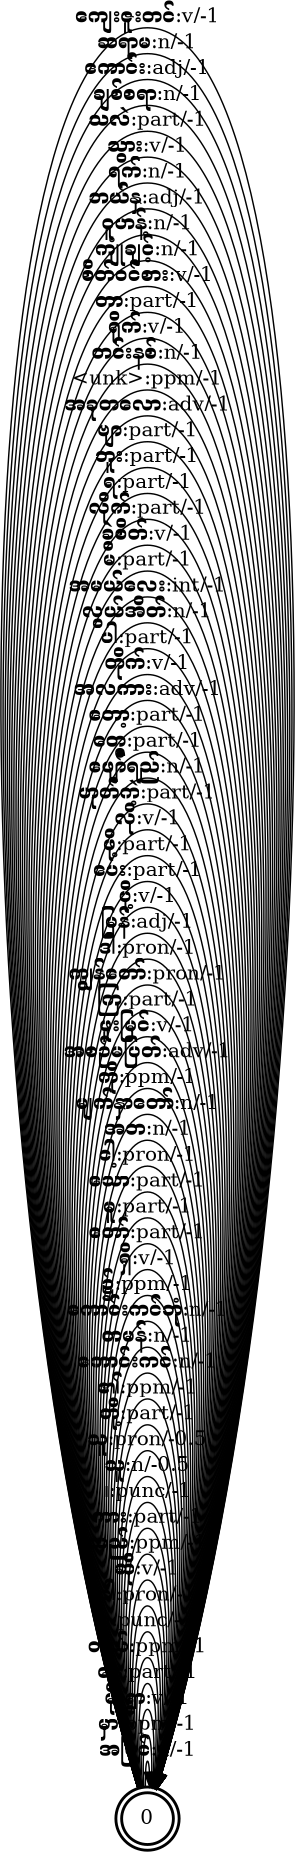

In [169]:
from IPython.display import Image
#Image(filename="lexicon_cropped.png", height=100, width=300)  # Adjust width
Image(filename="lexicon_cropped.png")

## Visualization of lexicon_sorted.fst  

sorting လုပ်ထားတဲ့ lexicon FST ဖိုင်ကိုလည်း visualization လုပ်ကြည့်ကြရအောင်။  

အရင်ဆုံး PDF ဖိုင်လည်း ထုတ်ထားမယ်။  

In [170]:
!fstdraw --portrait --isymbols=./words.syms --osymbols=./tags.syms ./lexicon_sorted.fst | dot -Tpdf > ./lexicon_sorted.pdf 

ပြီးတော့ png ဖိုင်ထုတ်မယ်။  

In [171]:
!fstdraw --portrait --isymbols=./words.syms --osymbols=./tags.syms ./lexicon_sorted.fst | dot -Tpng -Gdpi=300 > lexicon_sorted.png

crop လုပ်မယ်။  

In [172]:
!convert lexicon_sorted.png -trim +repage lexicon_sorted_cropped.png

lexicon_sorted_cropped.png ဖိုင်ကို visualization လုပ်မယ်။  

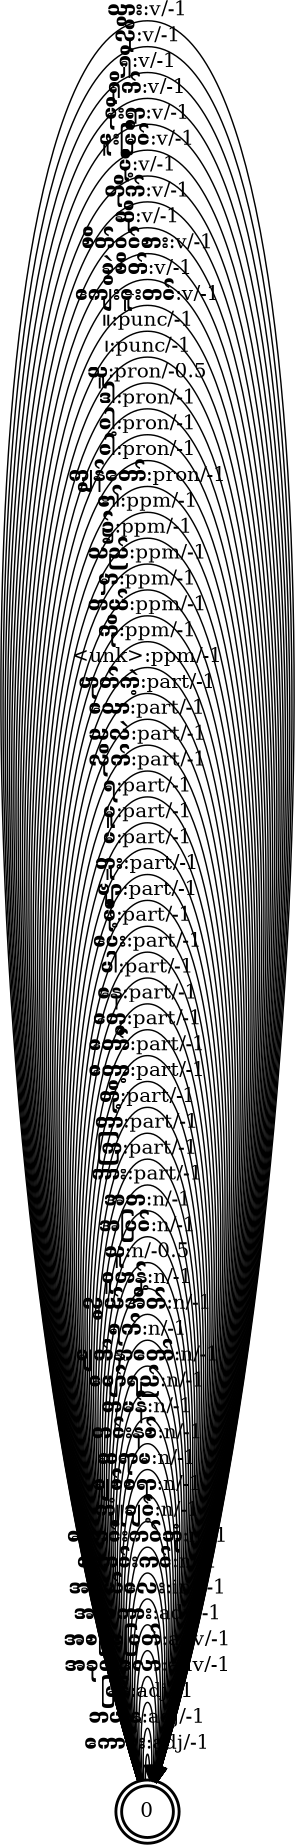

In [173]:
from IPython.display import Image
#Image(filename="lexicon_sorted_cropped.png", height=100, width=300)  # Adjust width
Image(filename="lexicon_sorted_cropped.png")

## Visualization of pos_lm.fst

ဒီတခါတော့ PDF ဖိုင်ကို pdfcrop command နဲ့ crop လုပ်ပြီး ပုံ့ကို ပြရတာ အဆင်ပြေအောင်လုပ်ပါမယ်။  

တခုရှိတာက pdfcrop command က ကိုယ်စက်ထဲမှာ မရှိရင် အောက်ပါအတိုင်း installation လုပ်ရပါလိမ့်မယ်။  

On Debian/Ubuntu-based systems:  
```
sudo apt update
sudo apt install texlive-extra-utils
```

တကယ်လို့ texlive ကို ကိုယ်စက်ထဲမှာ install မလုပ်ချင်ဘူး။ ပြီးတော့ conda  လည်း ရှိတယ်ဆိုရင်တော့ ...  
```
conda install -c conda-forge pdfcrop
```


In [206]:
!pdfcrop --version

pdfcrop 2023/04/15 v1.42


In [207]:
!pdfcrop --help

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
Syntax:   pdfcrop [options] <input[.pdf]> [output file]
Function: Margins are calculated and removed for each page in the file.
Options:                                                       (defaults:)
  --help              print usage
  --version           print version number
  --(no)verbose       verbose printing                         (false)
  --(no)quiet         silence normal output                    (false)
  --(no)debug         debug information                        (false)
  --gscmd <name>      call of Ghostscript                      (gs)
  --pdftex | --xetex | --luatex
                      use pdfTeX | use XeTeX | use LuaTeX      (pdftex)
  --pdftexcmd <name>  call of pdfTeX                           (pdftex)
  --xetexcmd <name>   call of XeTeX                            (xetex)
  --luatexcmd <name>  call of LuaTeX                           (luatex)
  --margins "<left

ပြီးတော့ dot (Graphviz) ရဲ့ "-Gmargin" option သုံးပုံသုံးနည်းက    

```
-Gmargin=X       # Same margin on all sides (e.g., -Gmargin=0)
-Gmargin="X,Y"   # X=horizontal margin, Y=vertical margin (e.g., -Gmargin="0,0.1")
```

Default က `-Gmargin=0.5` (0.5 inches of padding around the graph) ပါ။  
`-Gmargin=0` နဲ့ ဆွဲထားတဲ့ ပုံရဲ့ဘေးမှာရှိတဲ့ white space အပိုတွေအားလုံးကို ဖျက်ခိုင်းလို့ ရပါတယ်။



In [195]:
!fstdraw --portrait --isymbols=./tags.syms --osymbols=./tags.syms ./pos_lm.fst | dot -Tpdf  -Gmargin=0 > ./pos_lm.pdf 

In [210]:
!pdfcrop pos_lm.pdf pos_lm_cropped.pdf

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `pos_lm_cropped.pdf'.


In [189]:
!fstdraw --portrait --isymbols=./tags.syms --osymbols=./tags.syms ./pos_lm.fst | dot -Tpng -Gdpi=300 > pos_lm.png

In [196]:
!convert pos_lm.png -trim +repage pos_lm_cropped.png

In [197]:
!pdfcrop pos_lm.pdf pos_lm_cropped.pdf

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `pos_lm_cropped.pdf'.


In [202]:
#!convert pos_lm_cropped.pdf pos_lm_cropped.png
!convert -density 300 pos_lm_cropped.pdf -quality 100 pos_lm_cropped.png

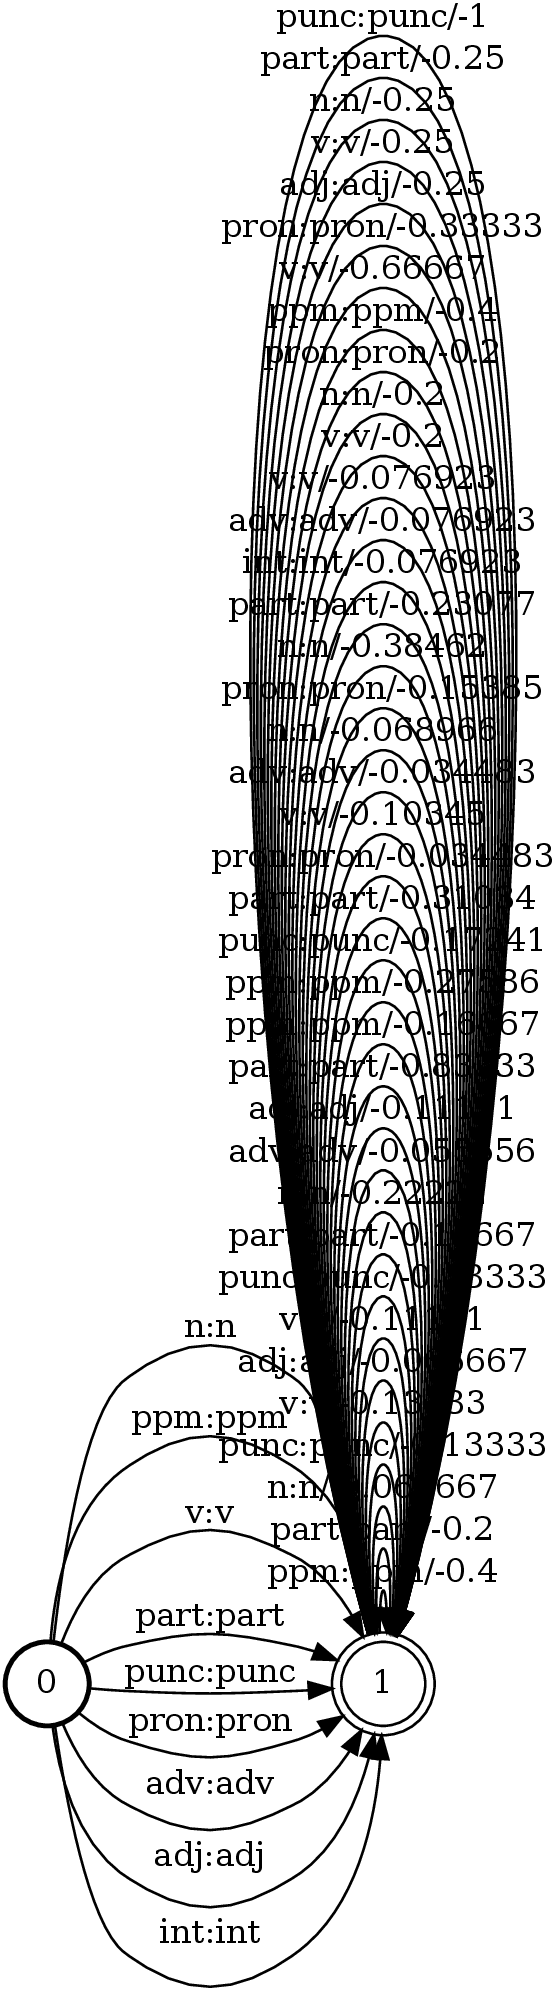

In [204]:
Image(filename="pos_lm_cropped.png", height=100, width=300)

## Visualizing pos_lm_sorted.fst  


In [218]:
!fstdraw --portrait --isymbols=./tags.syms --osymbols=./tags.syms ./pos_lm_sorted.fst | dot -Tpdf  -Gmargin=0 > ./pos_lm_sorted.pdf 

In [219]:
!pdfcrop pos_lm_sorted.pdf pos_lm_sorted_cropped.pdf

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `pos_lm_sorted_cropped.pdf'.


In [220]:
!convert -density 300 pos_lm_sorted_cropped.pdf -quality 100 pos_lm_sorted_cropped.png

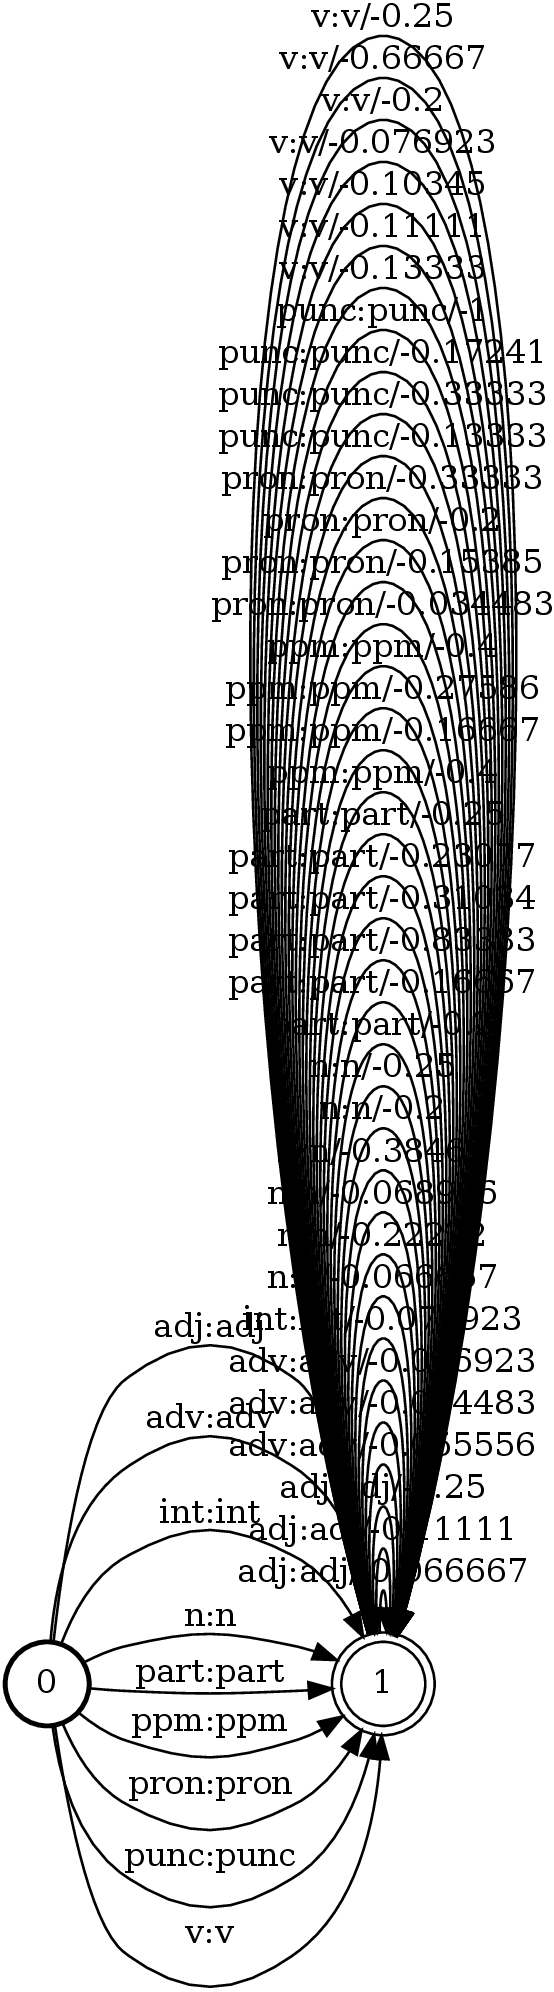

In [221]:
Image(filename="pos_lm_sorted_cropped.png", height=100, width=300)

## Visualizing pos_tagger.fst

In [222]:
!fstdraw --portrait --isymbols=./words.syms --osymbols=./tags.syms ./pos_tagger.fst | dot -Tpdf  -Gmargin=0 > ./pos_tagger.pdf 

In [223]:
!pdfcrop pos_tagger.pdf pos_tagger_cropped.pdf

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `pos_tagger_cropped.pdf'.


In [235]:
!convert -density 1800 pos_tagger_cropped.pdf -quality 100 pos_tagger_cropped.png

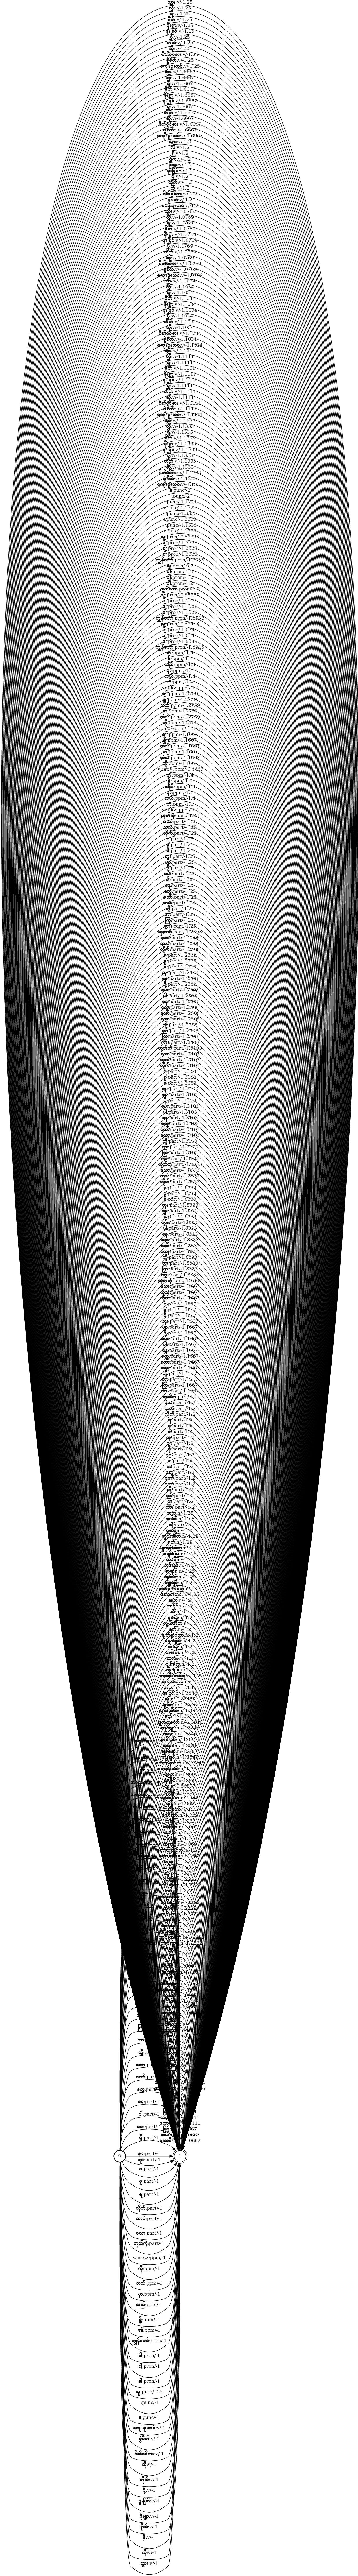

In [236]:
#Image(filename="pos_tagger_cropped.png", height=100, width=300)
Image(filename="pos_tagger_cropped.png")


## Summary  

စာကြောင်း ၁၀ ကြောင်းပဲရှိတဲ့ corpus size အသေးလေးနဲ့ WFST အခြေခံတဲ့ POS tagger ဆောက်တာကို အစအဆုံး လက်တွေ့ လုပ်ပြထားပါတယ်။  
ဒီ notebook ရဲ့ အဓိက ရည်ရွယ်ချက်က FST မော်ဒယ်တွေကို graph ပုံအနေနဲ့ ထုတ်ပြီး visualization လုပ်ပြတာဖြစ်ပါတယ်။    
FST graph ပုံတွေကနေ FST မော်ဒယ်တွေရဲ့ အလုပ်လုပ်ပုံကို လေ့လာရတာ လွယ်ကူမှာမို့ပါ။  